# Haberman's Survival of patients

About this file

1. Title: Haberman's Survival Data


2. Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


3. Number of Instances: 306


4. Number of Attributes: 4 (including the class attribute)


5. Attribute Information: Age of patient at time of operation (numerical) Patient's year of operation (year - 1900, numerical) Number of positive axillary nodes detected (numerical) Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year


6. Missing Attribute Values: None 

Source of Dataset- https://www.kaggle.com/gilsousa/habermans-survival-data-set



In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the file
haberman = pd.read_csv("haberman.csv")

In [4]:
#number of datapoints
haberman.shape[0]

306

In [5]:
#number of features
haberman.shape[1]

4

In [6]:
#printing 1st 5 rows
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [7]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


Observation:
All the features have 306 rows and hence there is no missing values. All the Features are integer data type.

In [8]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Observation:
    Minumum and Maximum age of patient at time of operation is 30 and 83 respectively.
    Minumum and Maximum number of positive axillary nodes detected is 0 and 52 respectively. 75 percentile of patients have 0-4 numbers of positive axillary nodes.

In [9]:
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

Observation: 225 patients survived 5 years or longer whereas 81 patients died within 5 years.

In [10]:
#correlation matrix
corr_matrix=haberman.corr()
corr_matrix["status"].sort_values(ascending=False)

status    1.000000
nodes     0.286768
age       0.067950
year     -0.004768
Name: status, dtype: float64

Observation: Nodes is most correlated to any other features.

# Exploratory Data Analysis

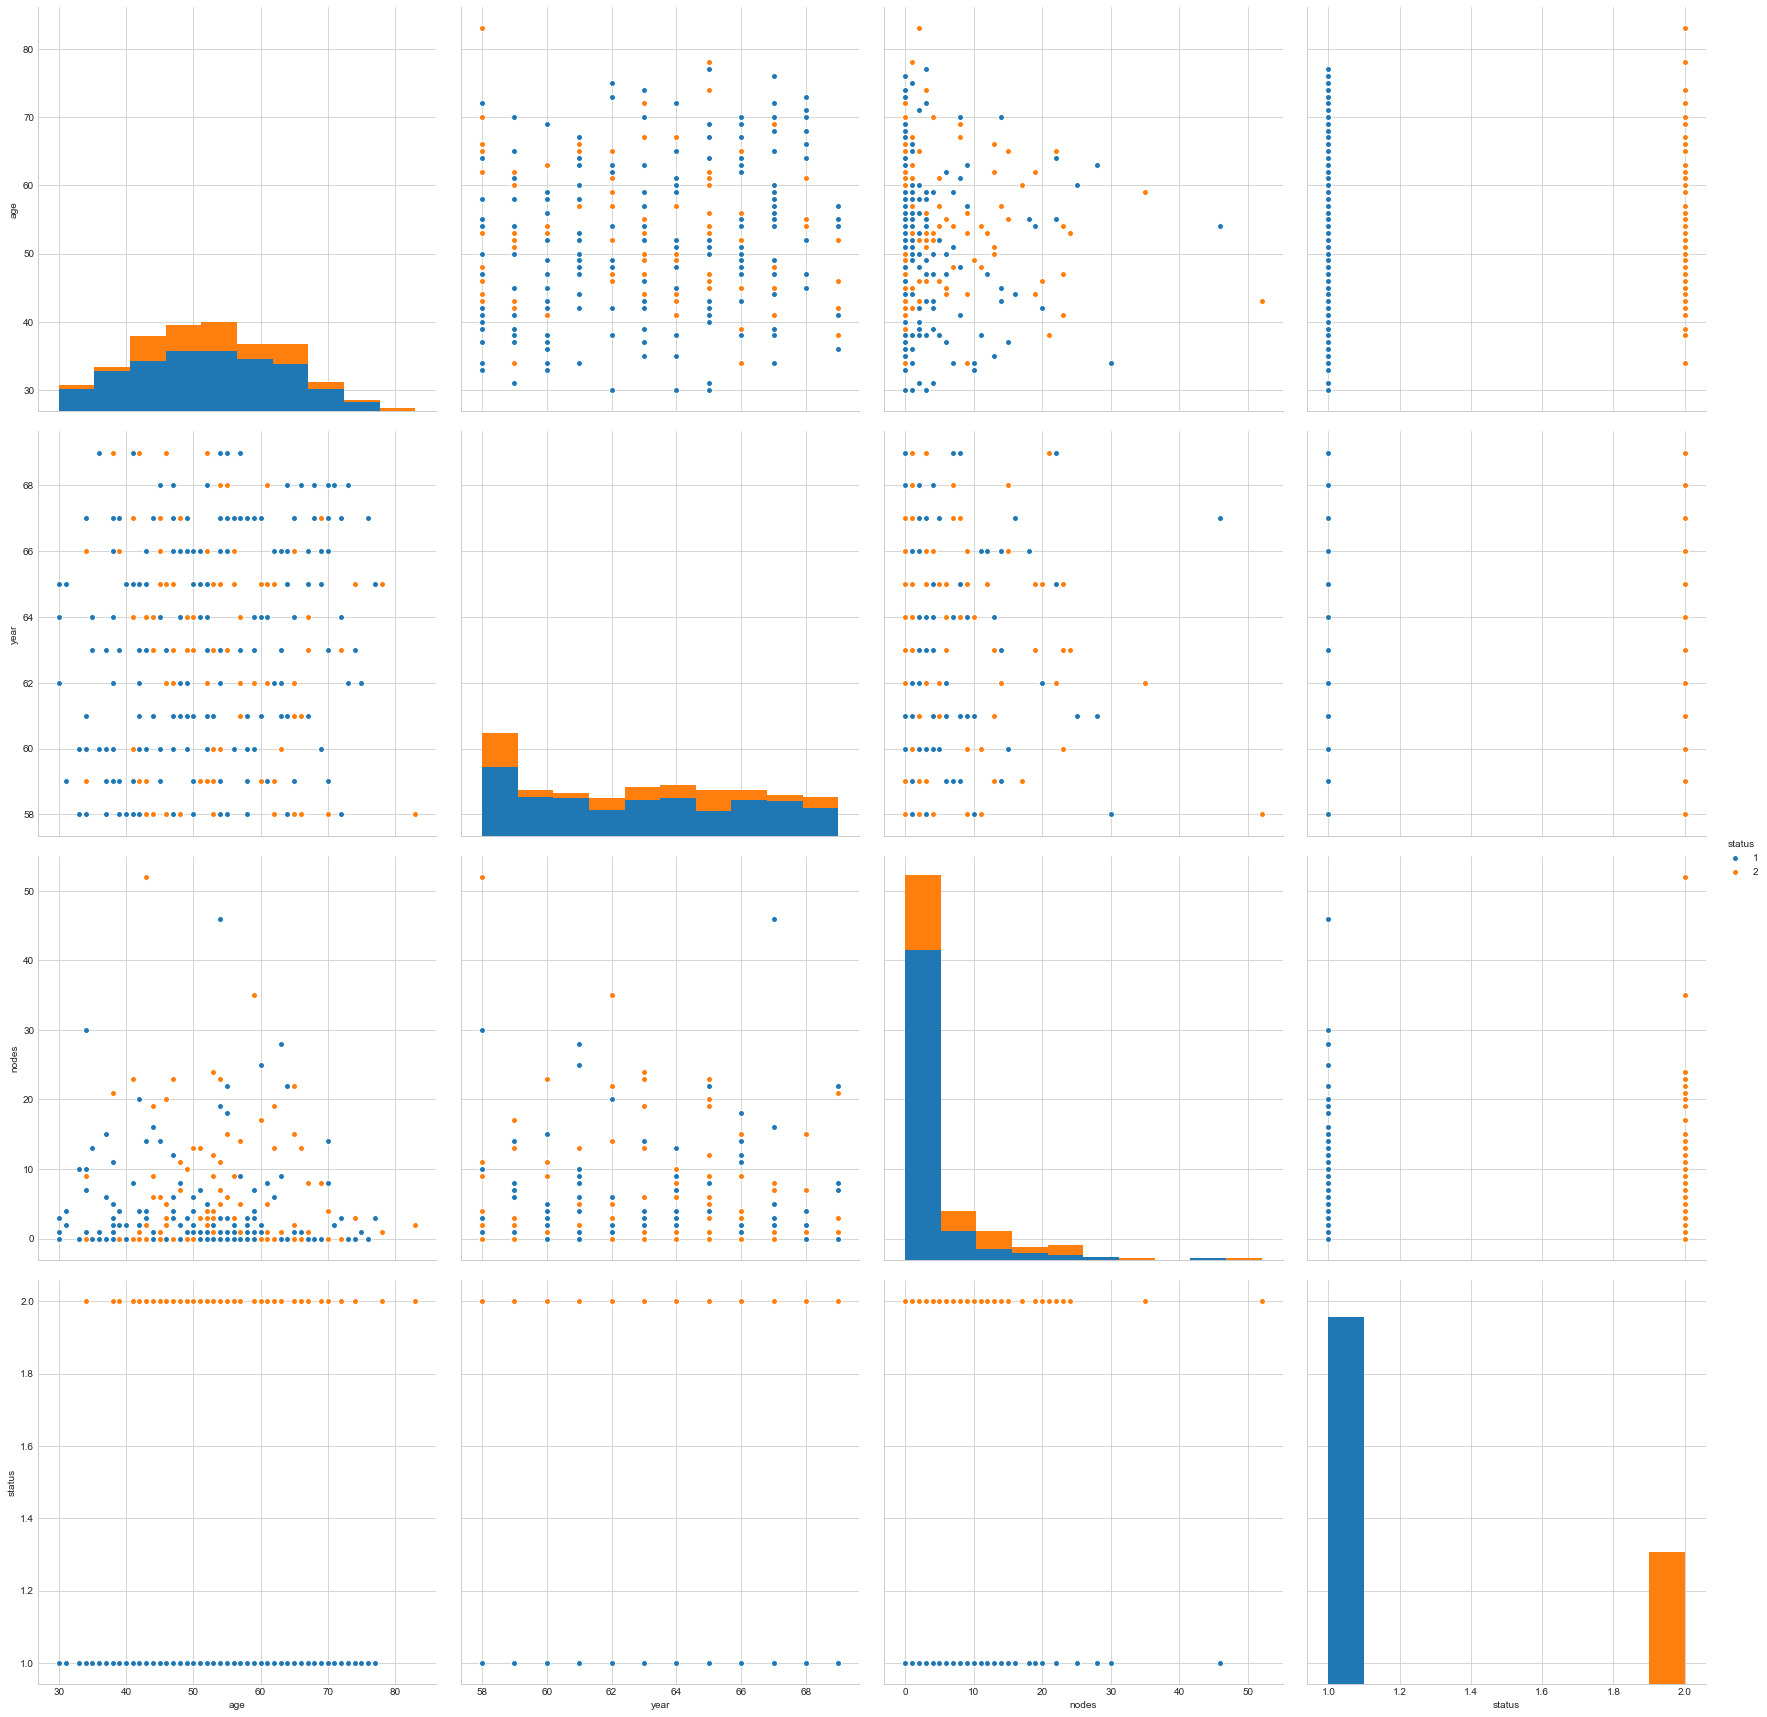

In [14]:
#pair plot
sns.set_style("whitegrid")
sns.pairplot(haberman,hue="status",size=6)
plt.show();

Observation: It's very hard to separate survived and non- survived patients as they have considerable overlap and hence cannot be dintinguish with a straight line with any combination of features. 

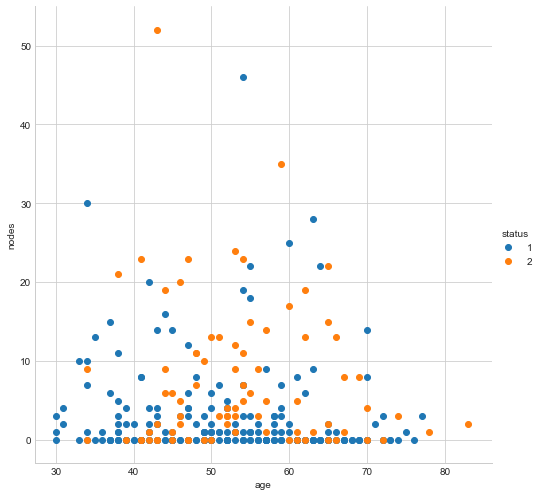

In [33]:
#Scatter plot (nodes v/s age) as both of these are more correlated to status
sns.set_style("whitegrid");
sns.FacetGrid(haberman,hue= "status",size=7)\
.map(plt.scatter,"age","nodes")\
.add_legend();
plt.show();

Observation: Most of the patients have 0 positive axially nodes whereas very few patients have nodes greater than 30. There is considerable amount of overlap between survived and non - survived patients and hard to separate them. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006AE94E2908>,
      dtype=object)

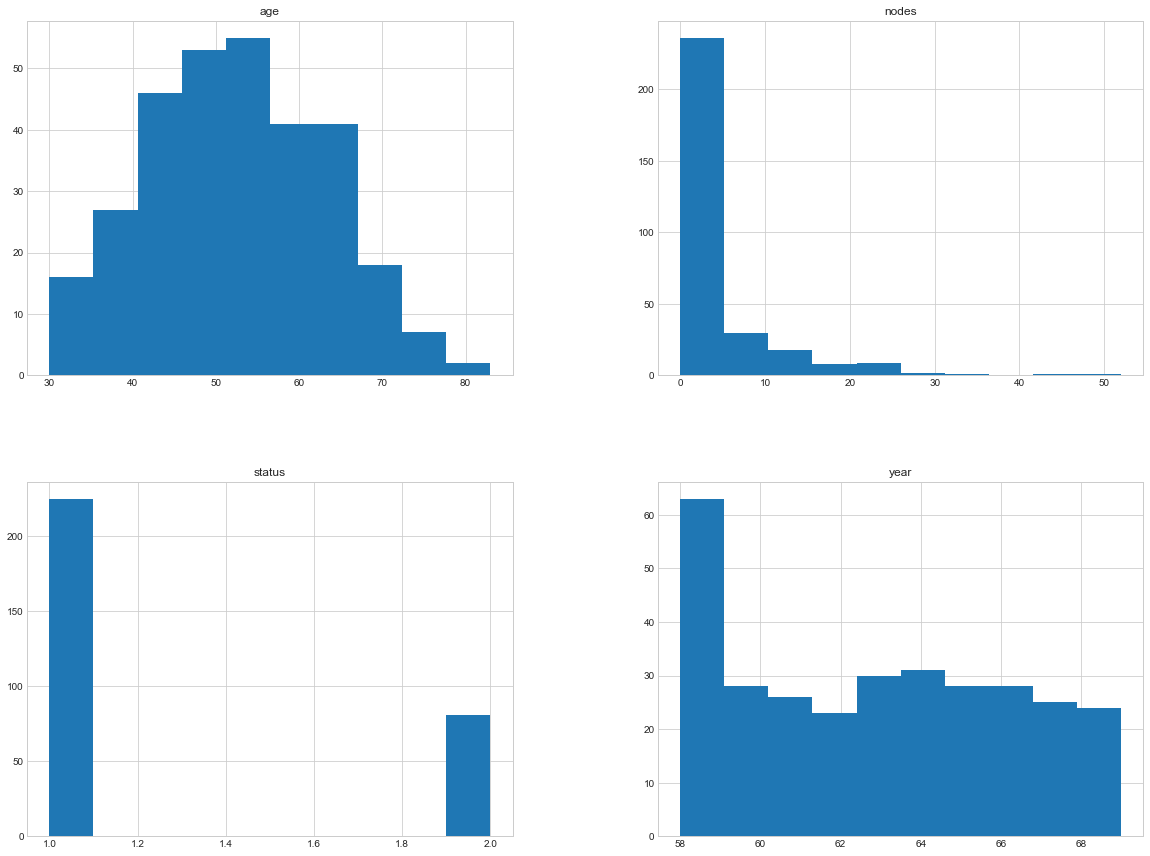

In [17]:
#histogram plot
haberman.hist(figsize=(20,15))

Observation: Age is kind of Normal distribution but not exactly normal distributed. Nodes mat be following Power law or Parito distribution as 80% of the points lies in first 20% region. There are very few patients which have nodes more than 30, even count is also very low. Most of the operations were done in the year 1958.

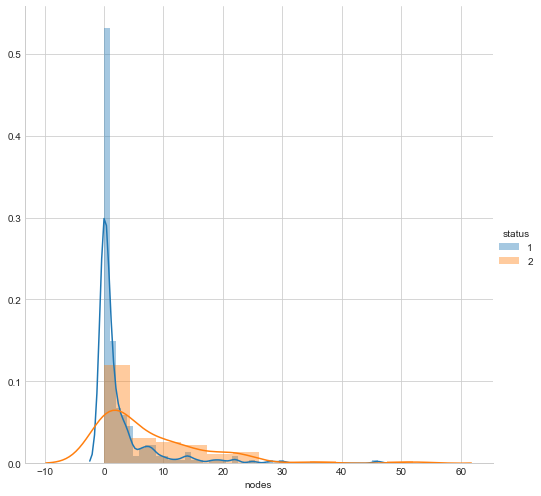

In [19]:
sns.FacetGrid(haberman,hue="status",size=7)\
.map(sns.distplot,"nodes")\
.add_legend();
plt.show();

Observation: It is right skewed and status 1 and 2 are overlaped. There are very high chances of patient survive if number of nodes is 0 or 1.

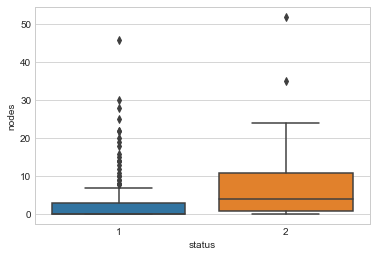

In [31]:
#Box-plot
sns.boxplot(x="status",y="nodes",data=haberman)
plt.show();

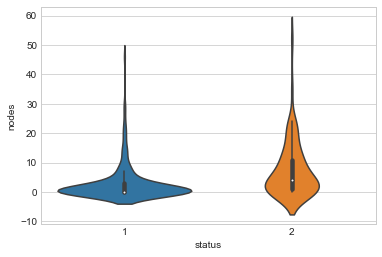

In [21]:
#violin plot
sns.violinplot(x="status",y="nodes",data=haberman)
plt.show();

Observation: Most of the patients who survived had 0 nodes but still few Patients who had 0 nodes did not survive for 5 years. More the number of nodes, lesser the survival chances.


# Trying new Attributes

In [22]:
haberman["agvnodes"]=haberman["nodes"]/haberman["age"]

In [27]:
haberman["ageyear"]=haberman["year"]/haberman["age"]

In [28]:
haberman.head()

,age,year,nodes,status,agvnodes,ageyear
0,30,64,1,1,0.033333,2.133333
1,30,62,3,1,0.100000,2.066667
2,30,65,0,1,0.000000,2.166667
3,31,59,2,1,0.064516,1.903226
4,31,65,4,1,0.129032,2.096774


In [29]:
corr_matrix=haberman.corr()
corr_matrix["status"].sort_values(ascending=False)

status      1.000000
nodes       0.286768
agvnodes    0.257827
age         0.067950
year       -0.004768
ageyear    -0.082262
Name: status, dtype: float64

Observation: The feature "avgnodes" is more correlated than "age" and "year" whereas "ageyear" is more correlated than "year". Hence we got few more features for modeling. 

# Modeling

Task: If new observation is given then we have to classify whether it belongs to class 1 or 2.
    It is a binary classification problem.

In [36]:
y = haberman["status"]

In [38]:
x = haberman.drop(["status"], axis=1)

In [39]:
x.head()

,age,year,nodes,agvnodes,ageyear
0,30,64,1,0.033333,2.133333
1,30,62,3,0.100000,2.066667
2,30,65,0,0.000000,2.166667
3,31,59,2,0.064516,1.903226
4,31,65,4,0.129032,2.096774


In [40]:
#Splitting x and y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [43]:
KNN.score(x_test, y_test)*100

66.12903225806451

In [44]:
from sklearn.naive_bayes import BernoulliNB
NB = BernoulliNB()
NB.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [45]:
NB.score(x_test, y_test)*100

70.96774193548387

In [46]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
LR.score(x_test, y_test)*100

69.35483870967742

In [48]:
from sklearn import svm
SVM = svm.SVC()
SVM.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
SVM.score(x_test, y_test)*100

72.58064516129032

Observation: SVM performs better than any other model with default values as its accuracy is more than others. KNN is our base model and have accuracy of 66.12% and accuracy of SVM is 72.58%.